<a href="https://colab.research.google.com/github/PROMITAGHOSH12/ADME-Property-Prediction_Caco-2/blob/main/ML__ON_Caco_Wang2(PaDEL_Descriptors).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing libraries and data**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
drug_train = pd.read_csv('/content/drug_train (1).csv')
drug_valid = pd.read_csv('/content/drug_valid (1).csv')
drug_test = pd.read_csv('/content/drug_test (1).csv')

**Traning Data**

In [ ]:
drug_train_x = drug_train.drop(columns=['Y'])
drug_train_x

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
633,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
634,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
635,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
drug_train_y = drug_train['Y']
drug_train_y

0     -6.22
1     -3.86
2     -4.09
3     -4.84
4     -6.12
       ... 
632   -5.36
633   -5.32
634   -5.97
635   -4.95
636   -4.84
Name: Y, Length: 637, dtype: float64

**Validation Data**

In [ ]:
drug_valid_x = drug_valid.drop(columns=['Y'])
drug_valid_x

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
87,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
88,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
89,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
drug_valid_y = drug_valid['Y']
drug_valid_y

0    -5.722754
1    -4.699485
2    -5.647924
3    -5.190000
4    -6.000000
        ...   
86   -4.700000
87   -4.330000
88   -4.958607
89   -4.331849
90   -5.820000
Name: Y, Length: 91, dtype: float64

**Testing Data**

In [ ]:
drug_test_x = drug_test.drop(columns=['Y'])
drug_test_x

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
178,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
179,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
180,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
drug_test_y = drug_test['Y']
drug_test_y

0     -5.489058
1     -4.849929
2     -3.920108
3     -5.672000
4     -4.990000
         ...   
177   -5.229574
178   -5.000000
179   -5.797940
180   -4.480000
181   -4.980000
Name: Y, Length: 182, dtype: float64

**Scalling for PCA**

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

drug_train_x = ss.fit_transform(drug_train_x)

drug_valid_x = ss.transform(drug_valid_x)

drug_test_x = ss.transform(drug_test_x)

In [ ]:
drug_train_x

array([[ 0.        ,  0.13255899,  0.51614106, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.13255899, -1.93745486, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.13255899,  0.51614106, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.13255899, -1.93745486, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.13255899,  0.51614106, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.13255899,  0.51614106, ...,  0.        ,
         0.        ,  0.        ]])

 **PCA**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)

drug_train_x = pca.fit_transform(drug_train_x)

drug_valid_x = pca.transform(drug_valid_x)

drug_test_x = pca.transform(drug_test_x)

In [ ]:
drug_train_x

array([[ 2.90333387, 11.71292406, -2.68512088, -1.53058445,  1.14258403,
        -1.55827316],
       [13.19118598, -5.73686772,  3.72399458, -4.83471882,  0.08758813,
        -6.24135985],
       [ 8.86179944, -5.8791662 ,  1.73821448, -1.46075747,  1.51883242,
        -0.65831598],
       ...,
       [14.71649011, -7.92689242,  4.44190042, -2.53342564, -1.09812683,
        -4.44103443],
       [ 3.70921099, -1.52141828, -4.80899752,  2.16656456,  2.08831757,
        -0.99406373],
       [ 6.26525444, 10.99099068,  0.84866155,  1.29797879,  0.49467039,
         4.07787313]])

**Scalling X and Y**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

drug_train_x = mms.fit_transform(drug_train_x)

drug_valid_x = mms.transform(drug_valid_x)

drug_test_x = mms.transform(drug_test_x)

In [ ]:
drug_train_x

array([[0.55905236, 0.81791549, 0.32953297, 0.43087129, 0.43590237,
        0.37172927],
       [0.87647099, 0.21840855, 0.55717036, 0.30408436, 0.39211821,
        0.19845509],
       [0.74289326, 0.21351972, 0.48663991, 0.4335507 , 0.45151734,
        0.40502768],
       ...,
       [0.92353232, 0.14316782, 0.58266876, 0.39239006, 0.34290897,
        0.26506712],
       [0.58391667, 0.36323498, 0.25409764, 0.57273905, 0.47515196,
        0.39260501],
       [0.66278015, 0.79311267, 0.45504499, 0.5394095 , 0.40901283,
        0.58026664]])

In [ ]:
drug_train_y = mms.fit_transform(pd.DataFrame(drug_train_y))

drug_valid_y = mms.transform(pd.DataFrame(drug_valid_y))

drug_test_y = mms.transform(pd.DataFrame(drug_test_y))

In [ ]:
drug_train_y

array([[0.35984957],
       [0.96645305],
       [0.90733484],
       [0.7145583 ],
       [0.38555308],
       [0.2827389 ],
       [0.78138757],
       [0.38555308],
       [0.47037473],
       [0.59889242],
       [0.74026194],
       [0.84050571],
       [0.85078713],
       [0.85849811],
       [0.82765389],
       [0.79937997],
       [0.89191274],
       [0.93046807],
       [0.89448314],
       [0.36241987],
       [0.60146273],
       [0.47294503],
       [0.39840477],
       [0.90476456],
       [0.71712873],
       [0.60146273],
       [0.75568406],
       [0.74026194],
       [0.46266362],
       [0.46266362],
       [0.46266362],
       [0.46266362],
       [0.82508362],
       [0.46266362],
       [0.46266362],
       [0.46266362],
       [0.46266362],
       [0.81737248],
       [0.46266362],
       [0.46266362],
       [0.46266362],
       [0.59632202],
       [0.67343269],
       [0.46266362],
       [0.46266362],
       [0.46266362],
       [0.59632202],
       [0.750

**LAZY PREDICT**

In [ ]:
! pip install lazypredict

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# Defines and builds the lazyregressor
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(drug_train_x, drug_valid_x, drug_train_y, drug_valid_y)

100%|██████████| 42/42 [00:03<00:00, 12.75it/s]


In [ ]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
PoissonRegressor,-0.08,-0.01,0.18,0.01
TweedieRegressor,-0.08,-0.01,0.18,0.01
GeneralizedLinearRegressor,-0.08,-0.01,0.18,0.03
HuberRegressor,-0.08,-0.01,0.18,0.02
BayesianRidge,-0.09,-0.02,0.18,0.01
LassoLars,-0.09,-0.02,0.18,0.01
DummyRegressor,-0.09,-0.02,0.18,0.01
ElasticNet,-0.09,-0.02,0.18,0.01
Lasso,-0.09,-0.02,0.18,0.02


**Search best hyperparameters**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

ada = AdaBoostRegressor(DecisionTreeRegressor(random_state=0),random_state=0)

parameters = {'n_estimators':[50, 100, 150, 200, 250, 300], 'learning_rate':[0.1, 0.3, 0.5, 0.7]}

adaboost = GridSearchCV(ada, parameters)

adaboost.fit(drug_train_x, drug_train_y)

GridSearchCV(estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=0),
                                         random_state=0),
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 0.7],
                         'n_estimators': [50, 100, 150, 200, 250, 300]})

In [ ]:
adaboost.best_params_

{'learning_rate': 0.5, 'n_estimators': 300}

In [ ]:
ada = AdaBoostRegressor(DecisionTreeRegressor(random_state=0), n_estimators = 250, learning_rate = 0.3, random_state=0)
ada.fit(drug_train_x, drug_train_y)
valid_pred = ada.predict(drug_valid_x)

**Inverse Scaling for ML model's performance check**

In [ ]:
drug_valid_y_ = mms.inverse_transform(drug_valid_y)
valid_y_pred_ = mms.inverse_transform([valid_pred])

**Checking ML model's performence**

In [ ]:
valid_y_pred_ = valid_y_pred_.reshape(-1, 1)

In [ ]:
from sklearn.metrics import mean_squared_error
print('RMSE: ', np.sqrt(mean_squared_error(drug_valid_y_, valid_y_pred_)))

RMSE:  0.7832578310568747


In [ ]:
from sklearn.metrics import mean_absolute_error
print('MAE: ', mean_absolute_error(drug_valid_y_, valid_y_pred_))

MAE:  0.6407265296641999


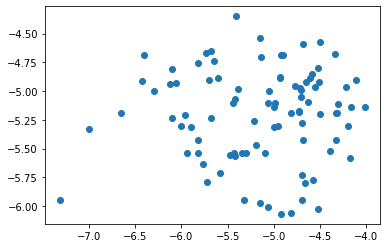

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(drug_valid_y_, valid_y_pred_)
plt.show()